# EDA

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import cv2

In [2]:
train = pd.read_csv('./data/train.csv')
sample_sub = pd.read_csv('./data/sample_submission.csv')

In [3]:
train.head()

ID  target
0  002f99746285dfdd.jpg      16
1  008ccd231e1fea5d.jpg      10
2  008f5911bfda7695.jpg      10
3  009235e4c9c07af5.jpg       4
4  00b2f44967580c74.jpg      16

## 클래스별 데이터의 수

In [4]:
train['target'].value_counts()

16    100
10    100
0     100
3     100
12    100
8     100
2     100
11    100
7     100
9     100
15    100
5     100
4     100
6     100
13     74
14     50
1      46
Name: target, dtype: int64

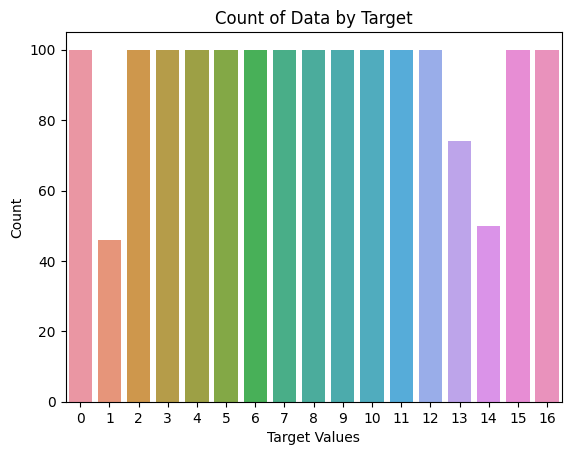

In [5]:
# 'target' 열의 값 별로 데이터의 수 계산
target_counts = train['target'].value_counts().reset_index()
target_counts.columns = ['Target', 'Count']

# seaborn을 사용하여 바 그래프 그리기
plt.figure()
sns.barplot(x='Target', y='Count', data=target_counts)
plt.xlabel('Target Values')
plt.ylabel('Count')
plt.title('Count of Data by Target')
plt.show()

## 노이즈 제거해보기
https://ivo-lee.tistory.com/91 참고

### 이미지 1

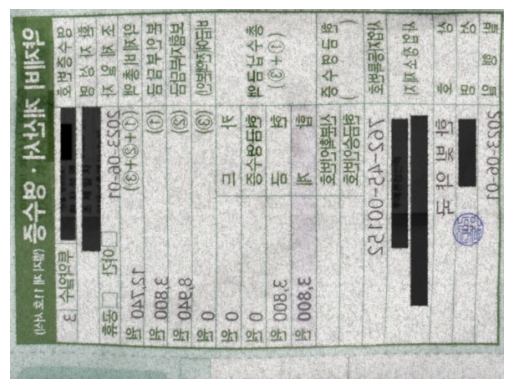

In [18]:
# 원본 이미지 출력
image = cv2.imread("./data/test/f83bc9783c06ac3a.jpg") # 이미지 로드
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image), plt.axis("off")
plt.show()

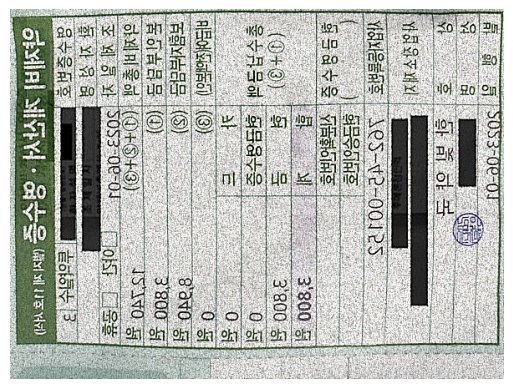

In [19]:
# 선명도 높혀보기
import albumentations as A

transform = A.Compose([
    A.Sharpen(alpha=(0.5, 0.5), lightness=(1.0, 1.0), p=1)
])

transformed = transform(image=image)
transformed_image = transformed["image"]
plt.imshow(transformed_image), plt.axis("off")
plt.show()

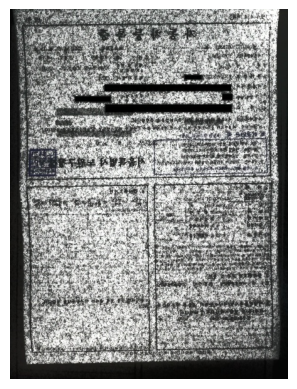

In [10]:
# 대비 높혀보기
image_bgr = cv2.imread("./data/test/0f00c6aad3b537de.jpg") # 이미지 로드
image_yuv = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2YUV) # YUV로 변경합니다.
image_yuv[:, :, 0] = cv2.equalizeHist(image_yuv[:, :, 0]) # 히스토그램 평활화를 적용
image_rgb = cv2.cvtColor(image_yuv, cv2.COLOR_YUV2RGB) # RGB로 바꿉니다.
plt.imshow(image_rgb), plt.axis("off") # 이미지 출력
plt.show()

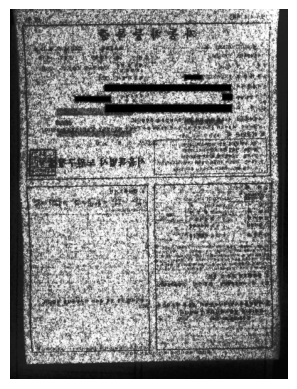

In [12]:
# 이미지 대비 높히기 (흑백 변경 후)
image = cv2.imread("./data/test/0f00c6aad3b537de.jpg", cv2.IMREAD_GRAYSCALE) # 흑백 이미지로 로드
image_enhanced = cv2.equalizeHist(image) # 이미지 대비를 향상시킵니다.
plt.imshow(image_enhanced, cmap="gray"), plt.axis("off") # 이미지 출력
plt.show()

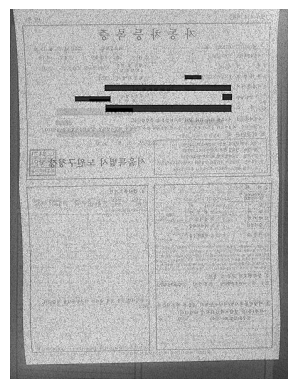

In [13]:
# 이미지 선명하게 하기
image = cv2.imread("./data/test/0f00c6aad3b537de.jpg", cv2.IMREAD_GRAYSCALE) # 흑백 이미지로 로드

kernel = np.array([[0, -1, 0],
                   [-1, 5,-1],
                   [0, -1, 0]]) # 커널을 만듭니다.

# 이미지를 선명하게 만듭니다.
image_sharp = cv2.filter2D(image, -1, kernel)

plt.imshow(image_sharp, cmap="gray"), plt.axis("off") # 이미지 출력
plt.show()

In [14]:
img = cv2.imread("./data/test/0f00c6aad3b537de.jpg")
denoised_img1 = cv2.fastNlMeansDenoisingColored(img, None, 15, 15, 5, 10) # NLmeans
denoised_img2 = cv2.GaussianBlur(img, (5, 5), 0) # Gaussian
denoised_img3 = cv2.medianBlur(img, 5) # Median
denoised_img4 = cv2.bilateralFilter(img, 5, 50, 50) # Bilateral

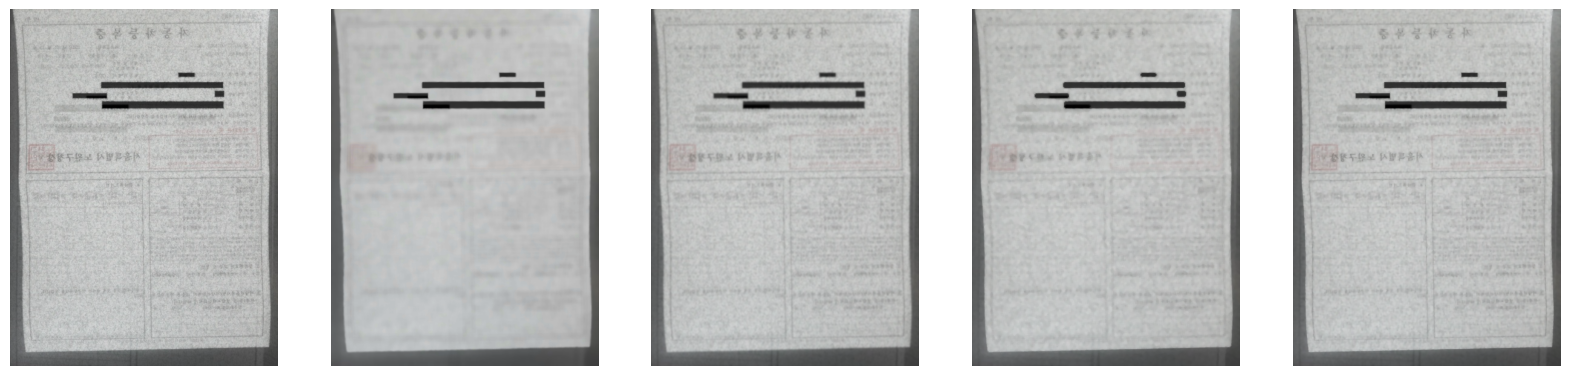

In [15]:
images = [img, denoised_img1, denoised_img2, denoised_img3, denoised_img4]

# 서브플롯 생성
fig, axes = plt.subplots(1, len(images), figsize=(20, 5))

# 각 이미지를 서브플롯에 넣기
for i, image in enumerate(images):
    axes[i].imshow(image)
    axes[i].axis("off")

# 그래프 표시
plt.show()

### 이미지 2

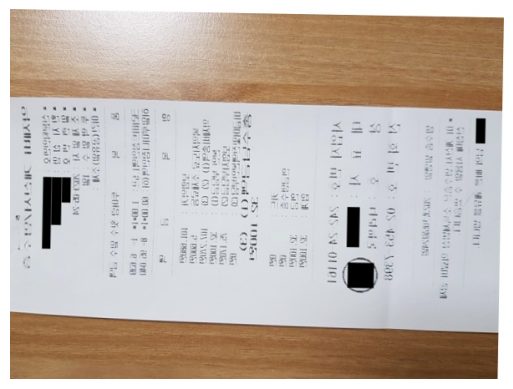

In [12]:
# 원본 이미지 출력
image = cv2.imread("./data/test/00c0dabb63ca7a16.jpg") # 이미지 로드
plt.imshow(image), plt.axis("off") # 이미지 출력
plt.show()

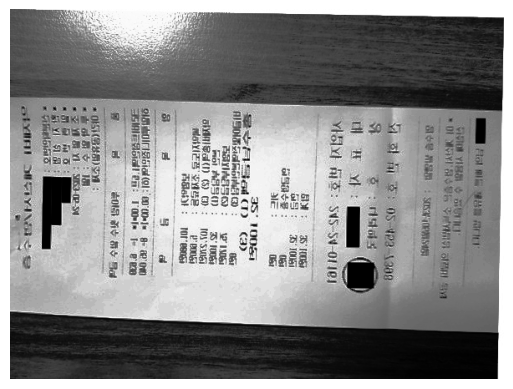

In [13]:
# 이미지 대비 높히기 (흑백 변경 후)
image = cv2.imread("./data/test/00c0dabb63ca7a16.jpg", cv2.IMREAD_GRAYSCALE) # 흑백 이미지로 로드
image_enhanced = cv2.equalizeHist(image) # 이미지 대비를 향상시킵니다.
plt.imshow(image_enhanced, cmap="gray"), plt.axis("off") # 이미지 출력
plt.show()

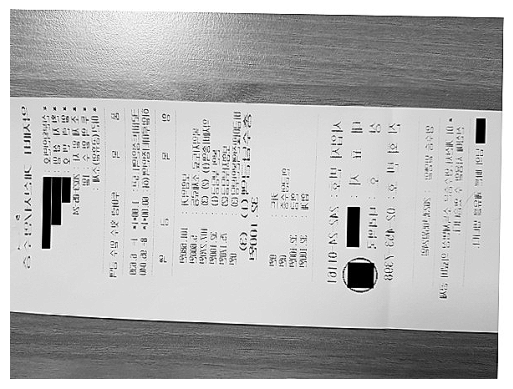

In [14]:
# 이미지 선명하게 하기
image = cv2.imread("./data/test/00c0dabb63ca7a16.jpg", cv2.IMREAD_GRAYSCALE) # 흑백 이미지로 로드

kernel = np.array([[0, -1, 0],
                   [-1, 5,-1],
                   [0, -1, 0]]) # 커널을 만듭니다.

# 이미지를 선명하게 만듭니다.
image_sharp = cv2.filter2D(image, -1, kernel)

plt.imshow(image_sharp, cmap="gray"), plt.axis("off") # 이미지 출력
plt.show()

### 이미지 3

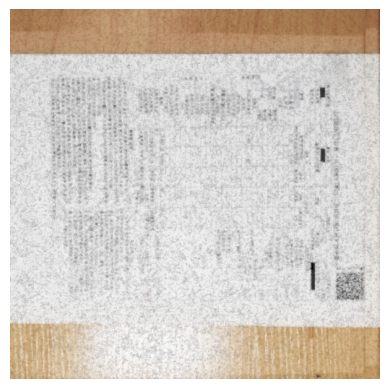

In [20]:
# 원본 이미지 출력
image = cv2.imread("./data/test/0b255faf6658e0fa.jpg") # 이미지 로드
plt.imshow(image), plt.axis("off") # 이미지 출력
plt.show()

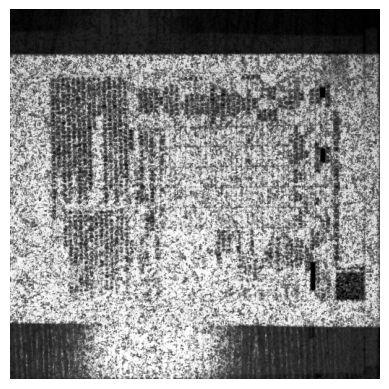

In [16]:
# 이미지 대비 높히기 (흑백 변경 후)
image = cv2.imread("./data/test/0b255faf6658e0fa.jpg", cv2.IMREAD_GRAYSCALE) # 흑백 이미지로 로드
image_enhanced = cv2.equalizeHist(image) # 이미지 대비를 향상시킵니다.
plt.imshow(image_enhanced, cmap="gray"), plt.axis("off") # 이미지 출력
plt.show()

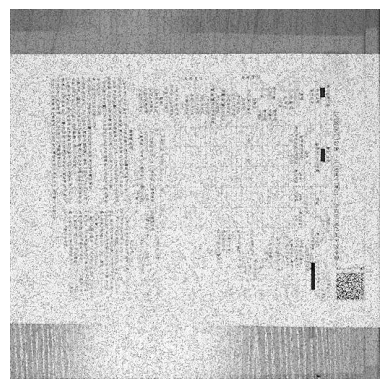

In [18]:
# 이미지 선명하게 하기
image = cv2.imread("./data/test/0b255faf6658e0fa.jpg", cv2.IMREAD_GRAYSCALE) # 흑백 이미지로 로드

kernel = np.array([[0, -1, 0],
                   [-1, 5,-1],
                   [0, -1, 0]]) # 커널을 만듭니다.

# 이미지를 선명하게 만듭니다.
image_sharp = cv2.filter2D(image, -1, kernel)

plt.imshow(image_sharp, cmap="gray"), plt.axis("off") # 이미지 출력
plt.show()

## 이미지 크기 확인
- 훈련데이터셋과 테스트데이터셋에서 이미지 최대 크기 확인해보기

In [17]:
train_id_list = train['ID'].to_list()

In [18]:
train_size_dict = {'h':0, 'w':0}
for id in train_id_list:
    image = cv2.imread(f'./data/train/{id}')
    h, w, c = image.shape
    train_size_dict['h'] = max(h, train_size_dict['h'])
    train_size_dict['w'] = max(h, train_size_dict['w'])

In [19]:
train_size_dict

{'h': 682, 'w': 682}

In [21]:
test_id_list = sample_sub['ID'].to_list()

In [22]:
test_size_dict = {'h':0, 'w':0}
for id in test_id_list:
    image = cv2.imread(f'./data/test/{id}')
    h, w, c = image.shape
    test_size_dict['h'] = max(h, test_size_dict['h'])
    test_size_dict['w'] = max(h, test_size_dict['w'])

test_size_dict

{'h': 763, 'w': 763}